# GFHS Dataset Profiling
___

**Author: Dale Lim**

**Date: 25/08/2021**

The goal of this notebook is to provide a brief and concise profile of the sample, or the respondents to the COVID-19 High Frequency Survey (GFHS) 2020 wave 1. In this exploratory exercise, we are interested in characterizing the respondents according to their location, sex, age, educational attainment, employment status, and income. 

## Preliminaries
___
We will use the following Python libraries:
- Pandas, mainly for for data manipulation, and
- Matplotlib, for data visualization.

We import the raw data csv provided to us, and examine the shape of the DataFrame. There are 1,986 rows present with 245 columns. 

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set style to use by matplotlib
plt.style.use("ggplot")

# Import main dataframe and examine shape
df = pd.read_csv("data/Data.csv")
df.shape

(1986, 245)

Throughout each variable we will examine, a common underlying number code for non-responses are the following. So let's take the opportunity to define it now. 

In [2]:
non_responses = {-1:"dk", -2:"ra", -3:"interviewer error", -7:"legal skip", -9:"broke off"}

## Profiling proper
___

Once again, we are interested in describing the sample with the following characteristics:
1. Location
2. Sex
3. Age
4. Educational attainment
5. Employment status
6. Income

### 1. Location
We use the `settlement` variable, which has four possible outcomes: Urban, Small Town, Rural, and Capital. With it, we create a frequency table of the sample on where they live. 

This is also a good opportunity to set up two functions that we will keep on using for later: the first for counting how many non-responses there are in a Series, defined by `non-responses`, and the second for converting a `value_counts()` table into one with the correct legends. 

In [3]:
# A function that counts how many non-responses there are in a DataFrame column
def count_non_response(col):
    total = 0
    for x in non_responses.keys():
        # Attempt to find the listed non-responses
        try:
            total += col.value_counts()[x]
        # In case no non-responses...
        except KeyError:
            # ...pass through the Key Error
            pass
    return total

# A function that converts the value_counts table from having a number code index into what they really mean
def mapped_value_counts(series, mapping, normalize=True):
    return series.map(mapping, na_action="ignore").value_counts(normalize=normalize)

Employing the function that we just made, we don't find any non-responses for this particular question/variable.

In [4]:
count_non_response(df.settlement)

0

We see that the majority of the sample lives in the capital city, Tblisi, at 37.66 percent of the population. The next largest group is in the Urban category, which are urban centers other than the capital. People who live in these places are at 29.76 percent of the sample.

In [5]:
# Create a dictionary that maps the number codes to what they really mean
settlement_conversion = {1: "Urban", 2: "Small Town", 3: "Rural", 4: "Capital"}

# Produce the frequency table of location
location = mapped_value_counts(df.settlement, settlement_conversion).round(4) * 100
location

Capital       37.66
Urban         29.76
Rural         29.51
Small Town     3.07
Name: settlement, dtype: float64

Together, people who live in urban areas (including the capital) make up about 67.42 percent, or about a third of the sample.

In [6]:
# Add `Capital` and `Urban` together
urban_total = round((location.Capital + location.Urban), 2)
text = "{} percent of the population live in urban areas including the capital.".format(urban_total)
print(text)

67.42 percent of the population live in urban areas including the capital.


The third largest group at 29.51 percent live in Rural, while the smallest group at 3.07 live in a Small Town. 

### 2. Age
We are interested in the `age` variable to create a distribution of the sample across age groups. It seems that  there are no non-responses.

In [7]:
count_non_response(df.age)

0

Since the scope of the sample only covers adults (i.e. aged 18 and above), it is indeed the case when we verify it. 

In [8]:
df.age.min()

18

Next, we will create a frequency tabble with ages grouped into ranges, i.e. ages 20-24, etc. and then proceed to produce a visualization of the table in the form of a histogram. We see from the table and the figure that the age cohort with the largest number of people in the sample are ages 35-39 with 10.7 percent, with the next highest group, ages 40-44, coming close at 10.1 percent. 

Take note of the potentially confusing notation here, `(` means that the number is exclusive of the range while `]` means that it is inclusive.

In [9]:
# Define bins
bins = [0,17,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89]

# Generate frequency table of age with the bins
age = df.age.value_counts(bins=bins, normalize=True).sort_index().round(4) * 100
age

(-0.001, 17.0]     0.00
(17.0, 19.0]       2.22
(19.0, 24.0]       5.74
(24.0, 29.0]       7.10
(29.0, 34.0]       9.72
(34.0, 39.0]      10.73
(39.0, 44.0]      10.07
(44.0, 49.0]       9.26
(49.0, 54.0]       9.82
(54.0, 59.0]       8.71
(59.0, 64.0]       9.77
(64.0, 69.0]       7.35
(69.0, 74.0]       5.24
(74.0, 79.0]       2.11
(79.0, 84.0]       1.86
(84.0, 89.0]       0.30
Name: age, dtype: float64

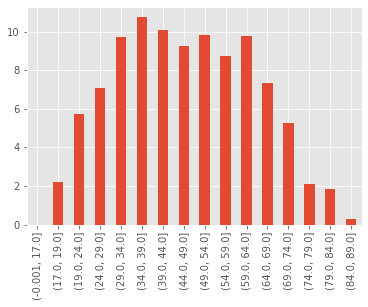

In [10]:
age.plot(kind="bar", rot=90)
plt.show()

### 3. Sex

For `sex`, we just want to find out a simple proportion of the sample's sex. Again, there are no non-responses.

In [11]:
count_non_response(df.sex)

0

In [12]:
# What percent of the sample is male or female?
mapped_value_counts(df.sex, {1:"male", 2:"female"}).round(4) * 100

female    55.09
male      44.91
Name: sex, dtype: float64

### 4. Educational attainment

For educational attainment, we are interested in `q11` which contains the highest educational attainment of the respondents. Once again, no non-resnposes so far. 

It is surprising that the masters or doctor-equivalent of educational attainment is the largest group represented here in the sample. Perhaps there is considerable bias in the selection of the sample that is skewed towards the more educated. 

In [13]:
count_non_response(df.q11)

0

In [14]:
# A dictionary that converts number codes to what they really mean
q11_conversion = {1: "no primary",
                  2: "primary",
                  3: "lower secondary",
                  4: "upper secondary",
                  5: "secondary technical/vocational",
                  6: "current bachelor's",
                  7: "masters, doctor-equivalent"}

mapped_value_counts(df.q11, q11_conversion).round(4) * 100

masters, doctor-equivalent        31.82
upper secondary                   31.72
secondary technical/vocational    18.33
current bachelor's                16.11
lower secondary                    1.81
no primary                         0.15
primary                            0.05
Name: q11, dtype: float64

### 5. Employment status

We look into `q21` for the employment status--either employed and unemployed. We find 6 non-responses.

The variable `q21` essentially asks whether the respondent is employed before the pandemic. Around 57.12 percent were unemployed while 42.88 percent were employed.

In [15]:
count_non_response(df.q21)

6

In [16]:
mapped_value_counts(df.q21.apply(lambda x:np.NaN if x < 0 else x), {0:"yes", 1:"no"}).round(4) * 100

no     57.12
yes    42.88
Name: q21, dtype: float64

As for the people who are employed, we want to know where they work. However, there is a large amount of non-responses for this question--862 non-responses, so we'll have to interpret the numbers carefully.. Among those who responded, a majority are part of the private sector at 46.0 percent, while the next largest groups are government at 26.16 and self-employed at 25.44 percents.

In [17]:
count_non_response(df.q22)

862

In [18]:
q22_conversion = {1: "government employee", 
                  2: "private sector employee",
                  3: "self-employed", 
                  4: "employer", 
                  96: "something else"}

industry = df.q22.apply(lambda x:np.NaN if x < 0 else x)
mapped_value_counts(industry, q22_conversion).round(4) * 100

private sector employee    46.00
government employee        26.16
self-employed              25.44
employer                    2.14
something else              0.27
Name: q22, dtype: float64

### 6. Income

We want to create a frequency table of the respondents according to their income grouped into quartiles. Two variables are of interest--`q29` for before the pandemic and `q30` for after the pandemic. There were 670 and 669 non-responses respectively. 

In [19]:
income_var = ["q29", "q30"]
for col in income_var:
    # Total responses
    print("non-responses for {}: {}".format(col, count_non_response(df[col])))

non-responses for q29: 670
non-responses for q30: 669


The mean income before the pandemic is 1,1160.87 GEL, while it is noticably lower after the pandemic at 869.34 GEL. Let's generate a boxplot of these two variables.

mean income for q29 is 1160.87 GEL.
mean income for q30 is 869.34 GEL.


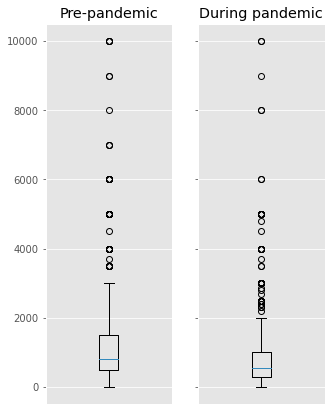

In [20]:
# What is the mean income?
for col in income_var:
    income = df[col].apply(lambda x: np.NaN if x < 0 else x).mean().round(2)
    print("mean income for {} is {} GEL.".format(col, income))

# Create boxplots for pre-pandemic (q29) and during pandemic (q30)
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(7); fig.set_figwidth(5)

# Generate series
income_q29 = df.q29.apply(lambda x: np.NaN if x < 0 else x)
income_q30 = df.q30.apply(lambda x: np.NaN if x < 0 else x)

# Plot q29 and q30 as boxplots
ax1.boxplot(income_q29[~income_q29.isna()])
ax1.set_title("Pre-pandemic")
ax2.boxplot(income_q30[~income_q30.isna()])
ax2.set_title("During pandemic")

# Share Y axis tick labels
plt.setp(ax2.get_yticklabels(), visible=False)
# Remove X axis ticks
for ax in (ax1, ax2):
    ax.set_xticks([])

# Show figure
plt.show()

Since the difference is noticably large, let's take this opportunity to test the statistical significance of this difference--the relative t-test. The p-value was shown to be indeed lower than a confidence level of 5 percent. This means that, indeed, the pandemic somehow significantly lowered the respondents' incomes. 

In [21]:
# Importing the relative t-test function from scipy.stats
from scipy.stats import ttest_rel

# Conduct the t-test
result = ttest_rel(df.q29, df.q30)

# Compare the p-value to an alpha of 0.05.
result.pvalue < 0.05

True

Next, we try to get the quantiles of the two variables. We see the same general pattern--since incomes generally decreased during the pandemic, w see the 25, 50, and 75 percent quantile also move down from 500, 800, and 1500 to 300, 540, and 1000 respectively. 

In [22]:
# Income quartiles
for col in income_var:
    income_quantile = df[col].apply(lambda x: np.NaN if x < 0 else x).quantile([.25,.5,.75])
    display(income_quantile)

0.25     500.0
0.50     800.0
0.75    1500.0
Name: q29, dtype: float64

0.25     300.0
0.50     540.0
0.75    1000.0
Name: q30, dtype: float64